In [101]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import scModel
reload(scModel)
myModel = scModel.Model(Del0=0, Del0A=2.78891656+3.99629354e-05j, Del0C=2.7777053 -6.94043255e-19j, Deld=0, Dels=0, mu=0, muB=0, t=1, inhomp=False, inhomi=True)
myModel2 = scModel.Model(Del0=0, Del0A=1, Del0C=1, Deld=0, Dels=0.2, mu=0, muB=0, t=1, inhomp=False, inhomi=True)
myModel3 = scModel.Model(Del0=0, Del0A=1, Del0C=1, Deld=2, Dels=0, mu=0, muB=0, t=1, inhomp=False, inhomi=True)
myModel4 = scModel.Model(Del0=0, Del0A=1, Del0C=1, Deld=3, Dels=0, mu=0, muB=0, t=1, inhomp=False, inhomi=True)
H = myModel.HBdG()
H2 = myModel.HBdG()

In [102]:
import AHM
reload(AHM)
da=-0
db=0
dc=-0
mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, U=1, nA=0.73284763, nB=0.87636886, nC=0.73246754, muB=0, mu=0, t=1, inhomp=True, inhomi=True)


In [103]:
k = np.linspace(0, 2*np.pi, 40)
vals = mM.DeltaN(k)

c:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\AHM.py:146: ComplexWarning: Casting complex values to real discards the imaginary part
  degen.append(d)


In [104]:
sum(vals[1])

(1.9950000000000019+0j)

In [105]:

#mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, nA=na, nB=nb, nC=nc,mu=0, U=3, t=1, inhomp=False, inhomi=True)
H = mM.HBdG()
k = np.linspace(0, 2*np.pi, 100)

k1 = np.ones(100)
k0 = np.zeros(100)
path = np.concatenate((k, k, k*np.sqrt(2)))
kx = np.concatenate((k,np.pi*2*k1, k[::-1]))
ky = np.concatenate((k0, k, k[::-1]))

p = [i for i in range(np.shape(path)[0])]
np.shape(p)
energies = mM.solvHam(kx, ky)

np.shape(energies)
emax = np.amax(energies)
emax = emax+0.1*emax

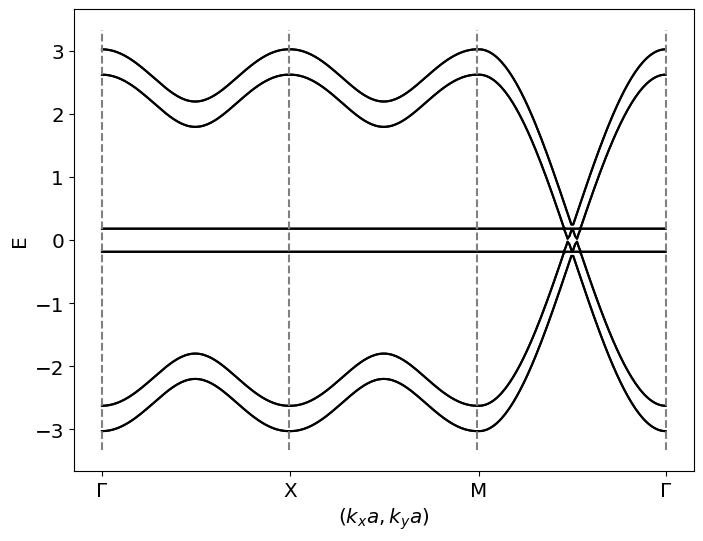

In [106]:
plt.figure(figsize=(8,6))
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-0.5, 0.5))

for i in energies:
    plt.plot(p, i, color='black')
#for i in energies2:
#    plt.plot(p, i, color='green', linestyle='dashdot')
#plt.plot(p, energies4[0], color='black', label=r'$\Delta_0=0.5$')
#plt.plot(p, energies2[0], color='green', linestyle='dashdot', label=r'$\Delta_0=1$')

plt.vlines([0, 99, 199, 299], [-emax, -emax, -emax, -emax], [emax, emax, emax, emax], colors= 'grey', linestyles='--')
#plt.vlines(250, -2, 2)
#plt.legend(fontsize='x-large')
#plt.savefig("Pictures/ESCpath.png")
#plt.savefig(newpath+"//bands.png")

plt.show()

In [107]:
myModel.mu

0

In [108]:
G = myModel.simple_stats()
print(G['avgap'])
H(1, 2)[8]

[1.27009233 1.51331592 2.53979537 1.51331592 1.27009233]


array([ 0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  1.08060461+0.j,
       -0.18311689+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j])

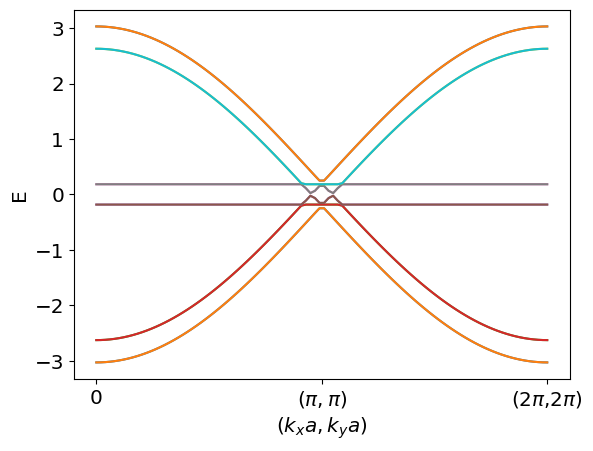

In [109]:
# Calculating energies along 
import numpy as np
import matplotlib.pyplot as plt

k = np.linspace(0, 2*np.pi, 100)

plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, np.sqrt(2)*np.pi, np.sqrt(2)*2*np.pi], labels=[r"0",r"($\pi,\pi$)",r"(2$\pi$,2$\pi$)"], size='x-large')

energies = np.array([np.linalg.eigvalsh(H(k_i, k_i)) for k_i in k])
energies2 = myModel.solvHam(k, k)

plt.plot(np.sqrt(2)*k, energies)
#plt.plot(k, energies2[5], color='black')
plt.show()

In [110]:
k = np.linspace(0, 2*np.pi, 100)

k1 = np.ones(100)
k0 = np.zeros(100)
path = np.concatenate((k, k, k*np.sqrt(2)))
kx = np.concatenate((k,np.pi*2*k1, k[::-1]))
ky = np.concatenate((k0, k, k[::-1]))

p = [i for i in range(np.shape(path)[0])]
np.shape(p)
energies = myModel.solvHam(kx, ky)
energies2 = myModel2.solvHam(kx, ky)
energies3 = myModel3.solvHam(kx, ky)
energies4 = myModel4.solvHam(kx, ky)
np.shape(energies)

(12, 300)

In [111]:
emax = np.amax(energies)
emax = emax+0.1*emax

In [112]:
G = myModel.simple_stats()
print(G['av'][6])

1.269897686412569


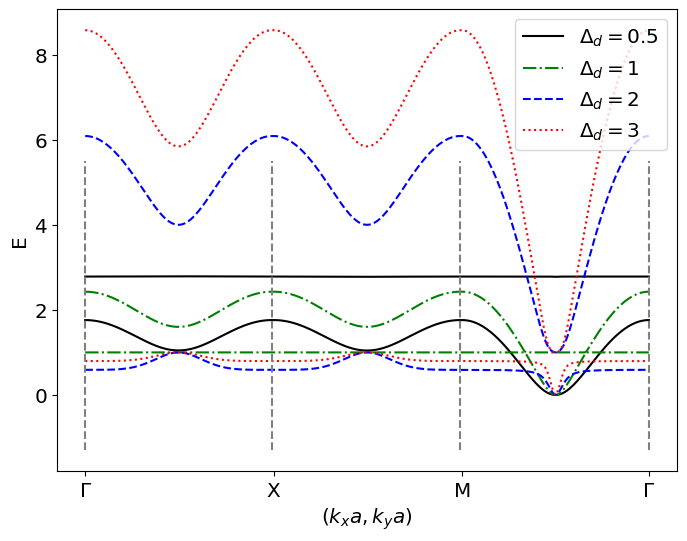

In [113]:
plt.figure(figsize=(8,6))
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-3, 3))


plt.plot(p, energies[6], color='black', label=r'$\Delta_d=0.5$')
plt.plot(p, energies2[6], color='green', linestyle='dashdot', label=r'$\Delta_d=1$')
plt.plot(p, energies3[6], color='blue', linestyle='--', label=r'$\Delta_d=2$')
plt.plot(p, energies4[6], color='red', linestyle='dotted', label=r'$\Delta_d=3$')

plt.plot(p, energies[8], color='black')
plt.plot(p, energies2[8], color='green', linestyle='dashdot')
plt.plot(p, energies3[8], color='blue', linestyle='--')
plt.plot(p, energies4[8], color='red', linestyle='dotted')

#plt.plot(p, energies[10], color='black')
#plt.plot(p, energies2[10], color='green', linestyle='dashdot')
#plt.plot(p, energies3[10], color='blue', linestyle='--')
#plt.plot(p, energies4[10], color='red', linestyle='dotted')

plt.vlines([0, 99, 199, 299], [-1.3, -1.3, -1.3, -1.3], [emax+0.5, emax+0.5, emax+0.5, emax+0.5], colors= 'grey', linestyles='--')
#plt.vlines(250, -2, 2)
plt.legend(fontsize='x-large')
plt.savefig("Pictures/ESCpathcomp.png")
plt.show()

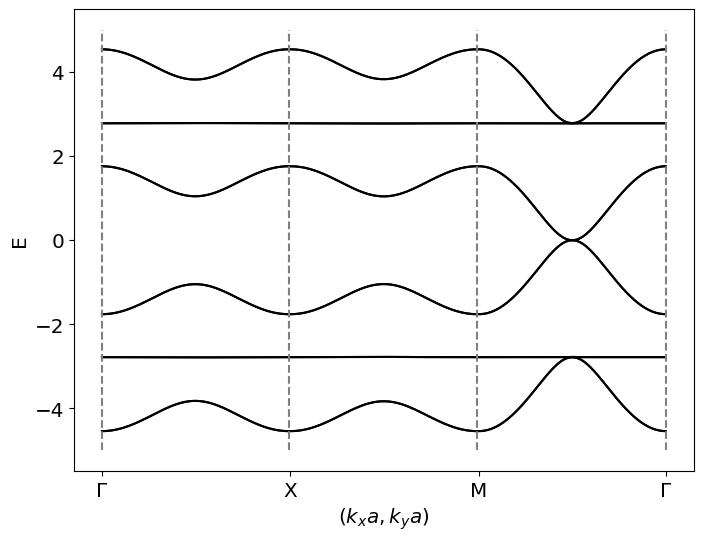

In [114]:
plt.figure(figsize=(8,6))
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-0.5, 0.5))

for i in energies:
    plt.plot(p, i, color='black')
#for i in energies2:
#    plt.plot(p, i, color='green', linestyle='dashdot')
#plt.plot(p, energies4[0], color='black', label=r'$\Delta_0=0.5$')
#plt.plot(p, energies2[0], color='green', linestyle='dashdot', label=r'$\Delta_0=1$')

plt.vlines([0, 99, 199, 299], [-emax, -emax, -emax, -emax], [emax, emax, emax, emax], colors= 'grey', linestyles='--')
#plt.vlines(250, -2, 2)
#plt.legend(fontsize='x-large')
plt.savefig("Pictures/ESCpath.png")
plt.show()

In [58]:
H(1, 0)[11]

array([ 0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  2.        +0.j, -0.18311689+0.j])

In [11]:
k

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

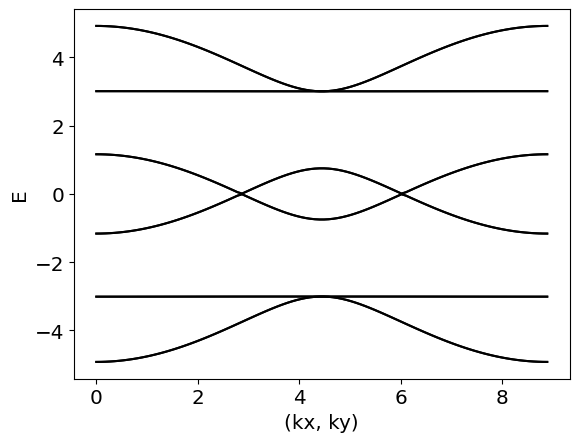

In [12]:
plt.xlabel("(kx, ky)", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')

#k = np.linspace(0, 2*np.pi, 300)
energies = myModel.solvHam(k, k)
for i in energies:
    plt.plot(k*np.sqrt(2), i, color='black')

#plt.plot(k*np.sqrt(2), energies[5], color='black', label='Ich in weird')

#.legend()
plt.savefig("Pictures/Ebands_SC.png")
plt.show()

In [13]:
Ens = myModel.Es(k)

In [1707]:
np.shape(Ens)

(12, 10100)

In [1708]:
energies

array([[-2.87886903, -2.87744526, -2.87317538, ..., -2.87317538,
        -2.87744526, -2.87886903],
       [-2.87886903, -2.87744526, -2.87317538, ..., -2.87317538,
        -2.87744526, -2.87886903],
       [-2.77886903, -2.77744526, -2.77317538, ..., -2.77317538,
        -2.77744526, -2.77886903],
       ...,
       [ 2.77886903,  2.77744526,  2.77317538, ...,  2.77317538,
         2.77744526,  2.77886903],
       [ 2.87886903,  2.87744526,  2.87317538, ...,  2.87317538,
         2.87744526,  2.87886903],
       [ 2.87886903,  2.87744526,  2.87317538, ...,  2.87317538,
         2.87744526,  2.87886903]])

In [1709]:
E = myModel.Es(k)
emax=np.amax(energies)
Earr = np.linspace(-emax-1,emax+1,200)
#Earr = np.linspace(-emax-1,emax+1,200)
emax

2.8788690319631276

In [1710]:
DOS1 = myModel.DOS(Earr, k, 0.4e-1)

In [1711]:
DOS1

array([6.53170991e-135, 1.59023901e-124, 1.49946129e-114, 5.47639544e-105,
       7.74813566e-096, 4.24724015e-087, 9.02189295e-079, 7.42772171e-071,
       2.37072356e-063, 2.93421206e-056, 1.40872881e-049, 2.62455977e-043,
       1.89837546e-037, 5.33401024e-032, 5.82615479e-027, 2.47604637e-022,
       4.09910143e-018, 2.64749198e-014, 6.68481659e-011, 6.61745113e-008,
       2.57877923e-005, 3.98029872e-003, 2.45680905e-001, 6.16252313e+000,
       6.46599699e+001, 3.00497265e+002, 7.01178681e+002, 1.06979444e+003,
       1.45533409e+003, 1.81884159e+003, 1.97952147e+003, 2.01519202e+003,
       2.03515914e+003, 2.06146424e+003, 2.09371968e+003, 2.13127715e+003,
       2.17420594e+003, 2.22302195e+003, 2.27863980e+003, 2.34245136e+003,
       2.41652961e+003, 2.50404661e+003, 2.61018287e+003, 2.74456286e+003,
       2.92949321e+003, 3.21301457e+003, 3.59078122e+003, 3.83123932e+003,
       3.81994874e+003, 3.72772103e+003, 3.43246139e+003, 2.95902999e+003,
       2.57320983e+003, 2

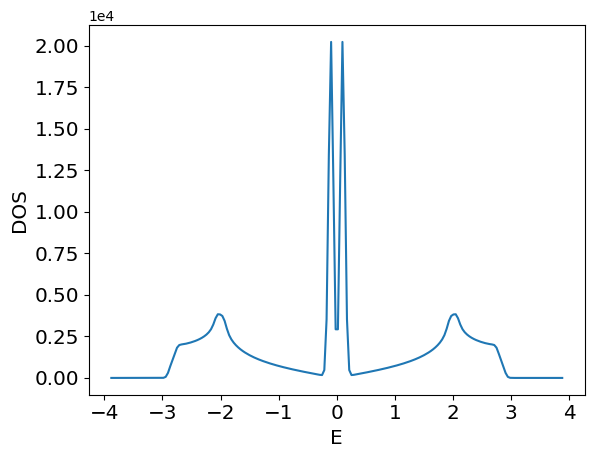

In [1712]:
plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
#plt.ylim(0, 1e5)
plt.plot(Earr, DOS1)
#plt.vlines([emax, -emax], 0, 100, colors='black')

plt.savefig("Pictures/DOS_SC.png")
plt.show()